<h1> Correlation Plot </h1> <br>
One way of getting a quick look at how all the features relate to the target variable, as well as how the features are related to one another.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns 
mpl.rcParams['figure.dpi'] = 200

df = pd.read_csv('cleaned_data.csv') #import data set

In [56]:
features_response = df.columns.tolist()
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

We will not look at __PAY_2__ to __PAY_6__, __SEX__, __ID__ and the OHE we created for __EDUCATION__, as they are incorrect, deemend 'unethical', unrelated to target variable or simply duplicated. 

In [57]:
items_to_remove =['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','ID','EDUCATION_CAT',
'graduate school','high school','others','university','none']

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Now to use the __Pearson correlation__ function __.corr()__ on our dataframe, after filtering for features and response/target variable of interest. This correlation is a linear correlation and isu sed to measure the strength and direction (positive or negative) of the linear relationship between two variables.

In [58]:
corr = df[features_response].corr()
corr.iloc[:5,:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot:>

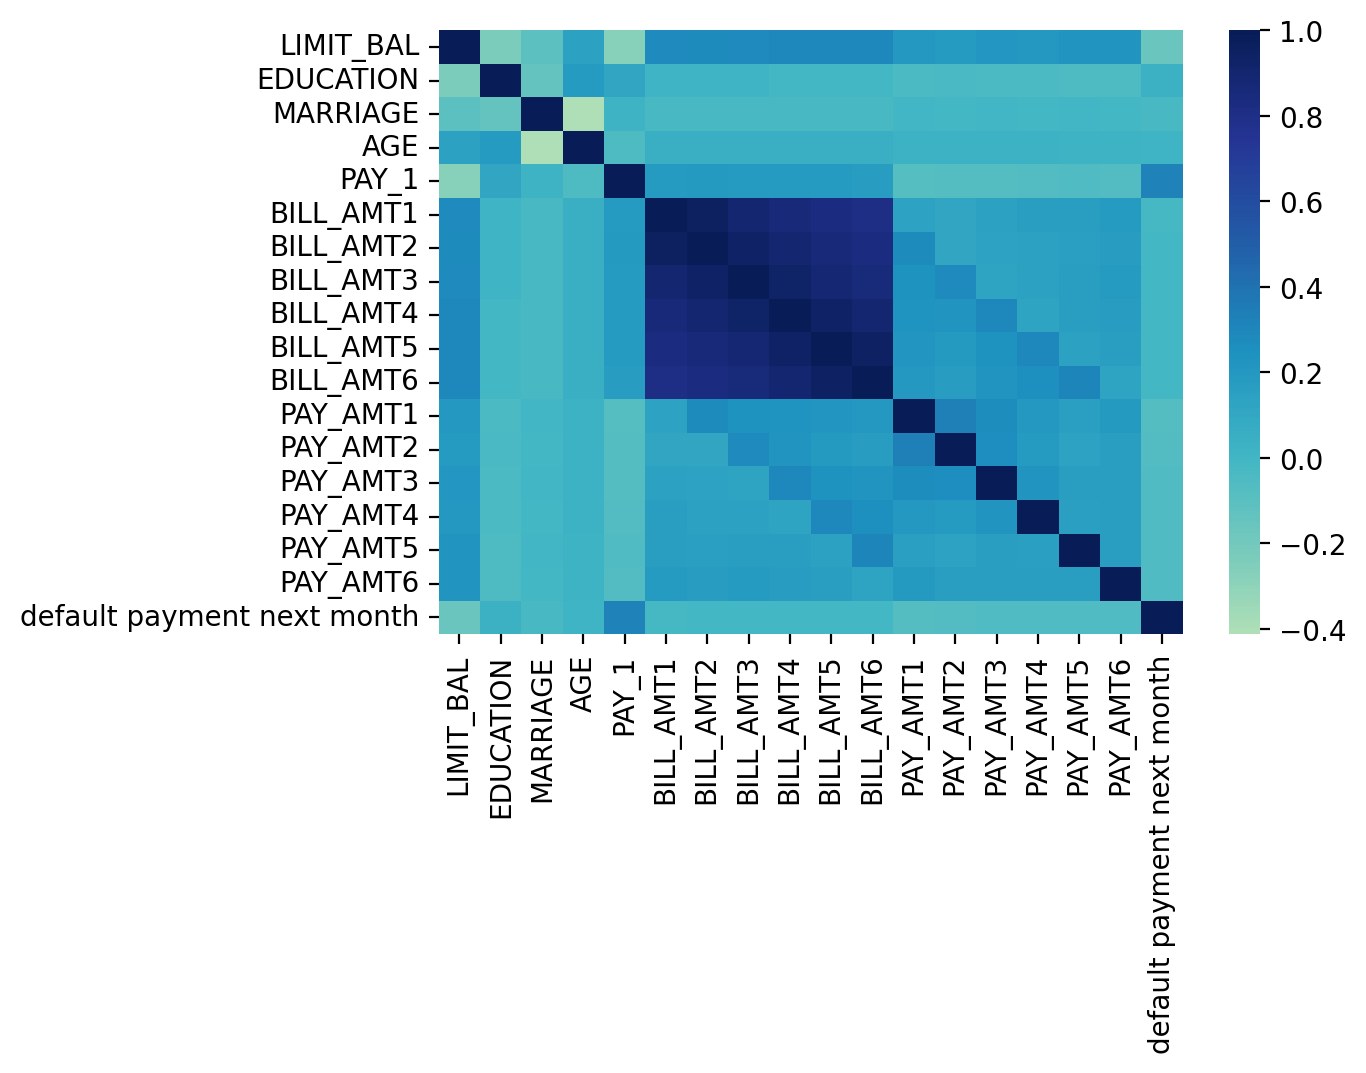

In [59]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0, cmap="YlGnBu")

We see that __PAY_1__ has the highest correlation among these features with the target variable (by examining the last row of the visual). Also the __BILL_AMT__ features have high correlations amongst eachother. Also the __LIMIT_BAL__ features is the most negatively correlated with our target variable, which will be important to look at. 

<b> What is linear correlation? </b> <br>
For two columns, $X$ and $Y$, linear correlation $\rho$ is defined as:
$$ \rho = \frac{\mathbb{E}\left[\left(X - \mu_X\right)\left(Y - \mu_Y\right)\right]}{\sigma_X \sigma_Y}$$ 
This is showing the the average of the difference between the elements of $X$ and their average $\mu_X$ multiplied by the difference between corresponding elements of $Y$ and their average, $\mu_Y$. The average is taken over pairs of $X, Y$ values. <br>
Thus when $X$ and $Y$ are both either simultaneously large or small, then both will be either positive or negative, and thus the product will be positive which leads to a __positive correlation__. <br>
If one increases and the other decreases, then the product will be negative which leads to a __negative correlation__. <br>
The denominator product serves to normalize the linear correlation to the scale of $[-1,1]$. *Stronger linear correlations* are closer to $1$ or $-1$. Otherwise if there is no linear relation between $X$ and $Y$, then correlation will be close to zero.

Note that Pearson correlation is not strictly appropriate for binary response variable, as in this case but gives a quick idea of potential useful features. It is only valid for __continuous data__. Also as this really only shows __linear__correlations, it may be useful to examine the relationship between features and responses individually through scatterplots or a __scatterplot matrix__. 

<h1> F-Test </h1> <br>

The __ANOVA F-test__, where ANOVA stands for "Analyis of Variance", is known as __f_classif__ in scikit-learn, is a test to see whether features are associated with a categorical response. It was be contrasted with __regression F-test__ which is similar to Pearson correlation, and is __f_regression__ in scikit-learn. <br>

Using the __F-test__ will output the $p$-value, which answers the question "For samples in the positive class, how likely is it that the average value of this feature is the same as that of samples in the negative class?". If a feature has very different average values between positive and negative classes it will:<br>

1. Be unlikely that those average values are the same (low $p$-value). <br>
2. Probably be a good feature in our model because it will help ot discriminate between positive and negative classes. <br>

__Univariate Feature Selection__: the process of testing features one by one against the response/target variable, to see which ones have predictive power.

In [60]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
X.shape, y.shape

((26664, 17), (26664,))

In [61]:
from sklearn.feature_selection import f_classif 

[f_stat, f_p_value] = f_classif(X,y)

Will create a dataframe containing feature names and the above outputs to facilitate inspection. Will sort (ascending) on $p$-value. Note as $p$-value decreases, $F$-statistic increases. So sorting works both ways.

In [62]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1], 'F statistic':f_stat, 'p value':f_p_value}).sort_values('p value')
f_test_df.head(10), f_test_df.shape

(      Feature  F statistic        p value
 4       PAY_1  3156.672300   0.000000e+00
 0   LIMIT_BAL   651.324071  5.838366e-142
 11   PAY_AMT1   140.612679   2.358354e-32
 12   PAY_AMT2   101.408321   8.256124e-24
 13   PAY_AMT3    90.023873   2.542641e-21
 15   PAY_AMT5    85.843295   2.090120e-20
 16   PAY_AMT6    80.420784   3.219565e-19
 14   PAY_AMT4    79.640021   4.774112e-19
 1   EDUCATION    32.637768   1.122175e-08
 2    MARRIAGE    18.078027   2.127555e-05,
 (17, 3))

Similar with Pearson corr, we see __PAY_1__ and __LIMIT_BAL__ are most significant features as they have the lowest $p$-values, which indicates the average values of these features between the positive and negative classes are __significantly different__ and so will help predict which class a sample belongs to. <br>

from __sklearn.feature_selection__ can use __SelectPercentile__ to retrieve only the $20\%$ of features with the highest $F$-statistics. To do the top $k$ features, can import __SelectKBest__.

In [63]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(f_classif, percentile=20) #instantiate an object of this class, choosing F-test as feature criteria
#and specifying percentile value

selector.fit(X,y)

SelectPercentile(percentile=20)

Note that using __.transform()__ or __fit_transform__ will access the selected features directly, but only the values and not their names; they both return NumPy arrays. To get the feature names from the feature selector object, need to use the __.get_support()__ method on the object, which returns the column indices of the feature array that were selected.

In [64]:
best_features_ix = selector.get_support()
best_features_ix, best_features_ix.shape

(array([ True, False, False, False,  True, False, False, False, False,
        False, False,  True,  True, False, False, False, False]),
 (17,))

In [65]:
features = features_response[:-1]
best_features = [features[counter] for counter in range(len(features)) if best_features_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

When using an $F$-test to look at difference in means between just two groups, this is called a __t-test__. An $F$-test can be extended to three or more groups for multiclass classification. For the __F-test__ to be valid, an assumption that needs to be met is data needs to be __normally distributed__. <br>

Also because of __multiple comparisons__, might need to take into account statistical __corrections__ for multiple comparisons (usually by adjusting the $p$-values) as comparing multiple features to the same respone variable, the odds of finding a "good" feature will increase simply by chance. 

In [66]:
overall_default_rate = df['default payment next month'].mean() #baseline for default
overall_default_rate

0.2217971797179718

In [67]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


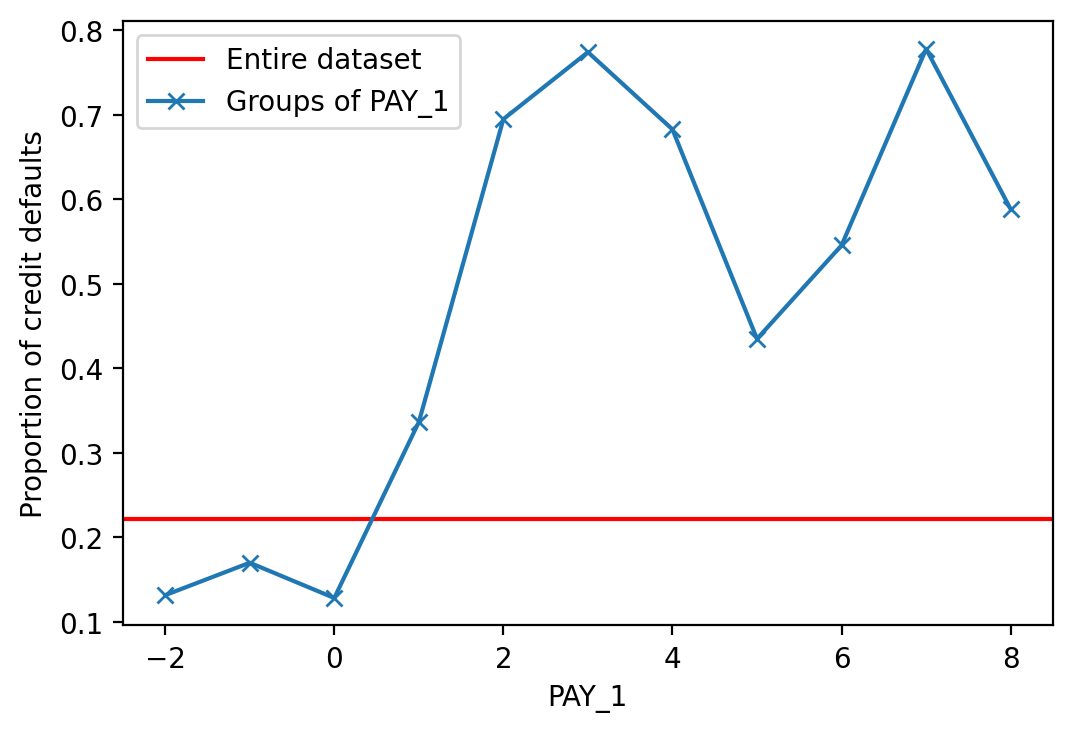

In [68]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red') #first argument is the y-intercept (our baseline as this is constant)
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset','Groups of PAY_1'])

We'll create a histogram for __LIMIT_BAL__ (as opposed to line graph) as it contains more data groups. Will separate the positive and negative classes using boolean masking.

Text(0.5, 1.0, 'Credit limits by response variable')

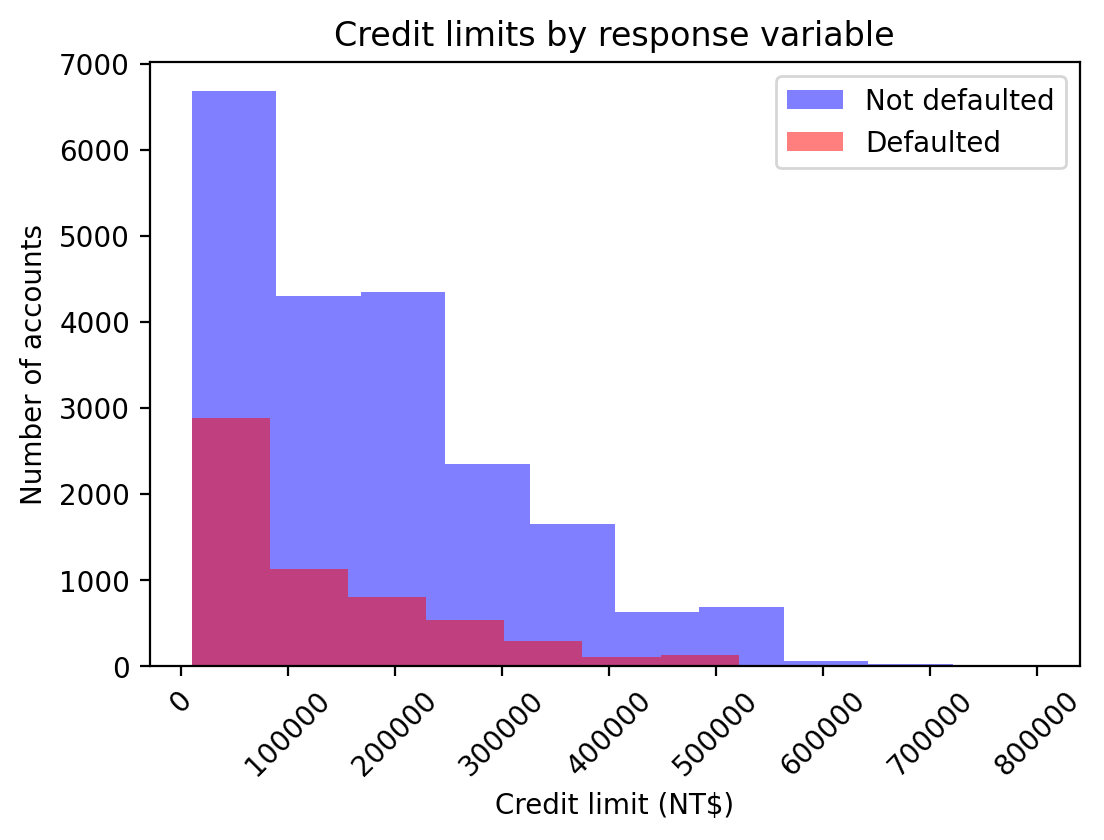

In [69]:
pos_mask = y == 1
neg_mask = y == 0

axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue') #alpha creates transperancy in the histograms
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

To make this visual more informative, will __normalize__ the data for this histogram (i.e. like a PMF). Also made a conscience decision to set the bins amount to 16.

In [70]:
bin_edges = list(range(0,df['LIMIT_BAL'].max() + 50000,50000))
bin_edges[-1]

800000

According to Matplotlib doc, for a normalized histogram the bin heights are calculated by __dividing the count by the number of observations times the bin width__. <br>

Thus, multiply y-axis tick labels by bin width of 50,000 so the bin heights represent the proportion of the total number of samples in each bin.

/var/folders/qp/cq_2m8bn7w574byl2650_yr00000gn/T/ipykernel_6187/2251032580.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000, 2)) #we round to 2 decimal places (second argument)


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

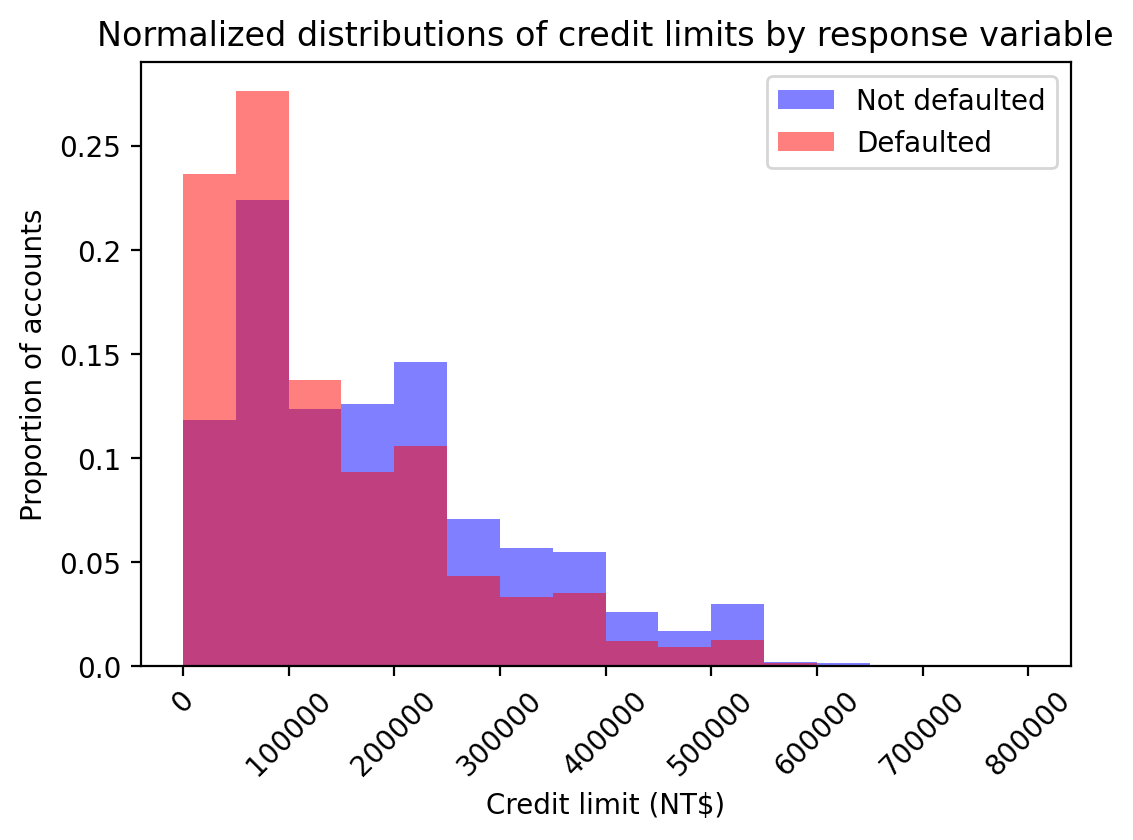

In [71]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2)) #we round to 2 decimal places (second argument)
axes.legend(['Not defaulted','Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

Thus accounts with lower credit limits ($< 150000$) are more likely to default. As lower credit limits generally reflect higher risk clients, this makes sense. <br>

<h1> Possible Questions not answered with Univariate Feature Selection </h1> <br>

It doesn't consider the interactions between features. i.e. What if the credit default rate is very high specifically for people with a certain education level __AND__ a certain range of credit limit? Also, this captures the linear effects of features, but what if the features have a polynomial/logarithmic or binning (discretization/step function) distribution? 

__Feature engineering__ is the process of creating new features from existing features. Although, the short-comings of linear feature selection can be remedied by non-linear modeling techniques such as __random forests__.

<h1> Evaluating the appropriateness of __PAY_1__ for Logistic Regression </h1>

By examining the __log odds__ (inverse of sigmoid function; i.e. $X = \log\left(\frac{p}{q}\right),$ where $X = \theta_0 + \sum_{i=1}^n \theta_i X_i$, is our feature vector) of the probability of defaulting. If the response variable is linear in the log odds, then logistic regression would be an appropriate model.

In [73]:
group_by_pay_mean_y #Dataframe with the log odds of this feature value

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


__p__ will represent the probability of default.

In [75]:
p = group_by_pay_mean_y['default payment next month'].values
q = 1-p 
odds_ratio = p/q 
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [76]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

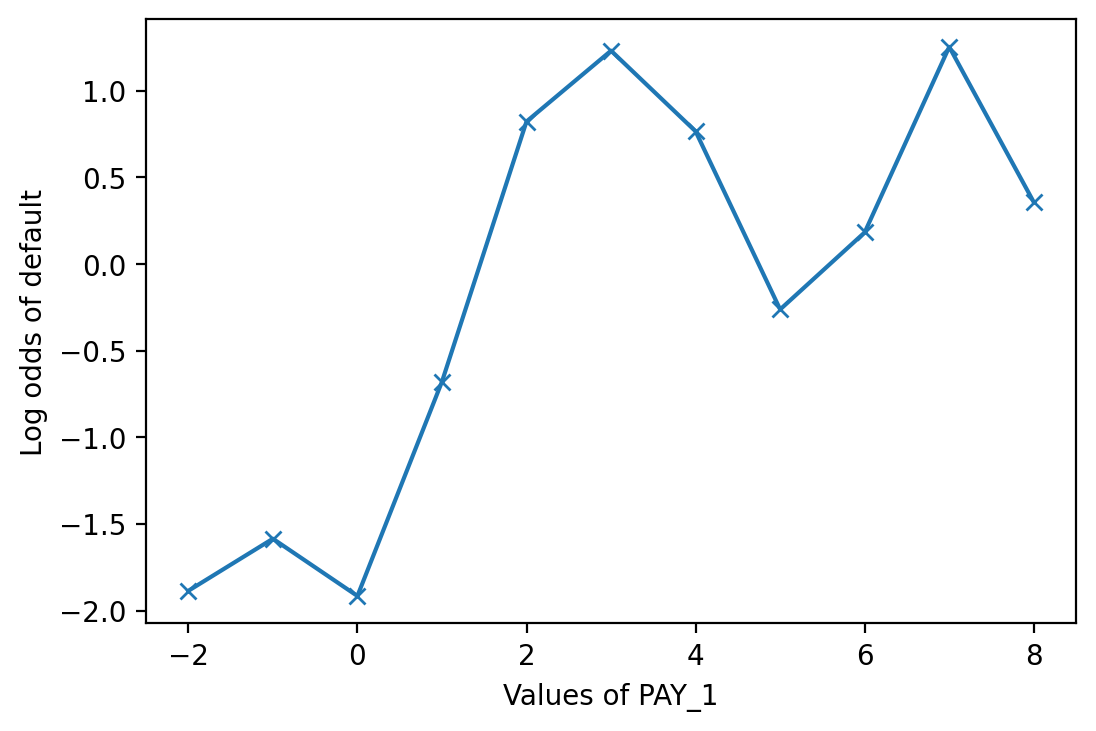

In [77]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

Although a line of best fit could be drawn on this plot, it seems like the values ${-2,1,0}$, ${1}$ and ${2,3,4,5,6,7,8}$ are all grouped on different levels of this plot. Thus perhaps engineering features on this response variable or encoding these groups differently may create a more effective modeling system.

Takeaway: Logistic regression predicts the probability of class membership according to the sigmoid function equation. In the case of two features, the equation is $$p = \frac{1}{1+e^{-(\theta_0 + \theta_1 X_1 + \theta_2 X_2)}}.$$ The parameters __intercept__ and __coefficients__ of the __.fit()__ method on Logistic regression are estimated from the above labeled training data. A given sample will then be classified as positive if $p \geq 0.5$ and negative otherwise, using __.predict()__ method.

Exercise 15: illustrate concept of a __decision boundary__ for a binary classification problem. Use synthetic data to create clear example of how decision boundary of logistic regression looks in comparison to the training samples.

In [78]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))

X_1_pos[0:3], X_1_neg[0:3], X_2_pos[0:3], X_2_neg[0:3]

(array([[6.35716091],
        [2.99187883],
        [5.92737474]]),
 array([[3.38132155],
        [8.03046066],
        [8.61519394]]),
 array([[5.4790643 ],
        [5.3444234 ],
        [3.43664678]]),
 array([[9.19684856],
        [9.83587114],
        [8.85836015]]))

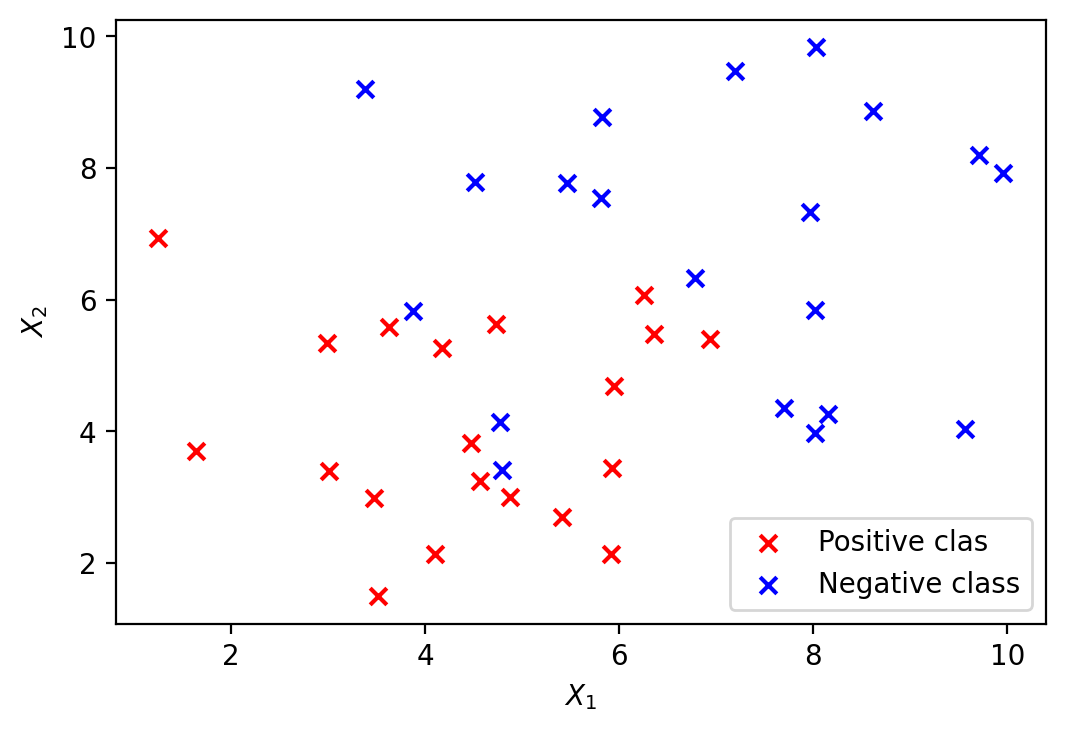

In [79]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive clas','Negative class'])

To use the synthetic features with scikit-learn need to assemble them into a matrix, __np.block()__ can be used to create a $40 \times 2$-matrix. 

In [80]:
X = np.block([[X_1_pos, X_2_pos],[X_1_neg,X_2_neg]])
X.shape, X[0:3]

((40, 2),
 array([[6.35716091, 5.4790643 ],
        [2.99187883, 5.3444234 ],
        [5.92737474, 3.43664678]]))

Now to create a response variable for the features.

In [82]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,) #np.vstack takes a tuple as an argument

y[0:5], y[-5:]

(array([1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0.]))

In [83]:
from sklearn.linear_model import LogisticRegression

new_lr = LogisticRegression(solver='liblinear')
new_lr.fit(X,y)

LogisticRegression(solver='liblinear')

In [86]:
y_pred = new_lr.predict(X)
positive_indices = [i for i in range(len(y_pred)) if y_pred[i] == 1]
negative_indices = [i for i in range(len(y_pred)) if y_pred[i] == 0]

positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

As the positive indices should've been the first 20 indices (by construction), we see not all have been correctly predicted. We will plot the the true labels with X symbols and the predictions with circles.

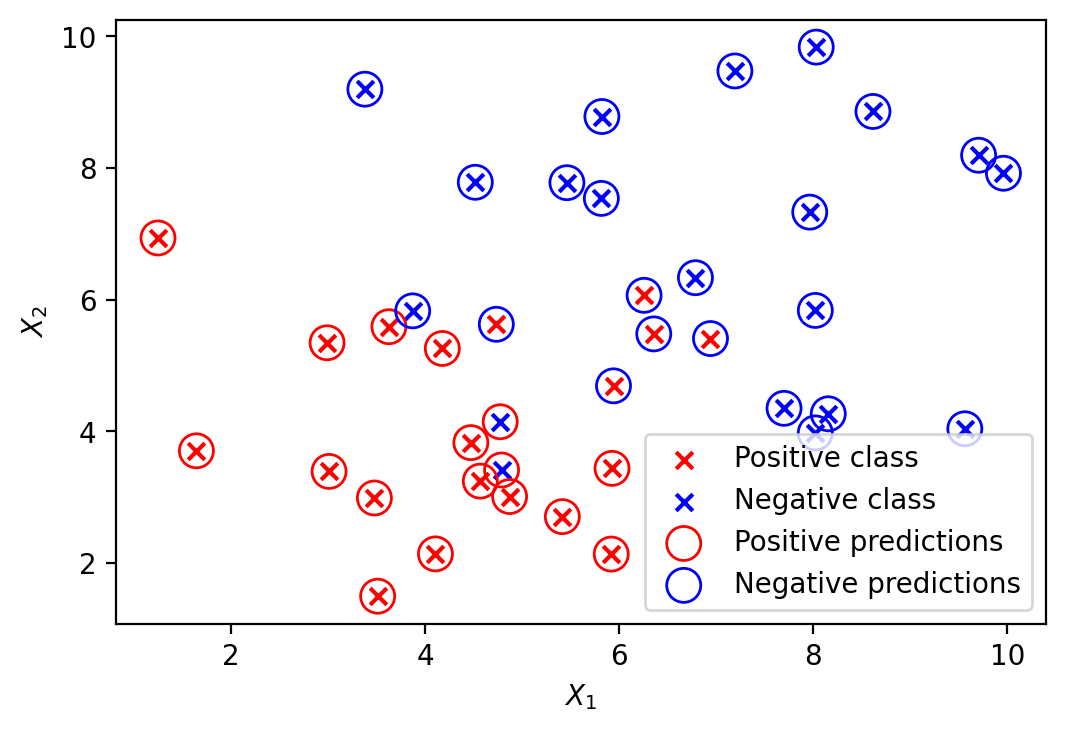

In [90]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o', edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class','Negative class','Positive predictions', 'Negative predictions'])

In [92]:
theta_1 = new_lr.coef_[0][0]
theta_2 = new_lr.coef_[0][1]

theta_0 = new_lr.intercept_

theta_1, theta_2, theta_0

(-0.20245058016285838, -0.25336423626773225, array([2.25479161]))